In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/fake-real-users-insta/user_fake_authentic_2class.csv")

In [4]:
df

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,r
65322,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,r
65323,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,r
65324,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,r


In [5]:
df.describe()

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
count,65326.000000,6.532600e+04,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000
mean,176.571227,1.183077e+03,2310.519211,57.497061,0.951765,0.281925,136.520344,0.250012,0.193229,19.146641,1.139421,0.208877,0.507796,0.032745,0.052837,0.299098,496.475193
std,723.470655,2.170802e+04,2592.096104,64.129260,0.214264,0.449940,215.714486,0.337891,0.252939,121.047570,5.810627,0.300362,1.156921,0.220987,0.519058,0.349604,944.905389
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.230000e+02,394.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,2.730000,0.080000,0.000000,0.000000,0.000000,0.000000,0.033327,24.571458
50%,30.000000,3.380000e+02,995.000000,32.000000,1.000000,0.000000,46.000000,0.055556,0.059000,9.450000,0.440000,0.000000,0.077000,0.000000,0.000000,0.136915,183.227943
75%,124.000000,8.170000e+02,3600.000000,110.000000,1.000000,1.000000,170.000000,0.444444,0.333000,18.680000,1.040000,0.333000,0.611000,0.000000,0.000000,0.456342,580.771927
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134766


In [6]:
df.isnull().sum()

pos      0
flw      0
flg      0
bl       0
pic      0
lin      0
cl       0
cz       0
ni       0
erl      0
erc      0
lt       0
hc       0
pr       0
fo       0
cs       0
pi       0
class    0
dtype: int64

In [7]:
df.dtypes

pos        int64
flw        int64
flg        int64
bl         int64
pic        int64
lin        int64
cl         int64
cz       float64
ni       float64
erl      float64
erc      float64
lt       float64
hc       float64
pr       float64
fo       float64
cs       float64
pi       float64
class     object
dtype: object

In [8]:
print("Clase class antes de label encoding \n",df["class"])
df['class'] = df['class'].astype('category').cat.codes
print("Clase class despues de label encoding \n",df["class"])

Clase class antes de label encoding 
 0        f
1        f
2        f
3        f
4        f
        ..
65321    r
65322    r
65323    r
65324    r
65325    r
Name: class, Length: 65326, dtype: object
Clase class despues de label encoding 
 0        0
1        0
2        0
3        0
4        0
        ..
65321    1
65322    1
65323    1
65324    1
65325    1
Name: class, Length: 65326, dtype: int8


array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'flw'}>,
        <Axes: title={'center': 'flg'}>, <Axes: title={'center': 'bl'}>],
       [<Axes: title={'center': 'pic'}>, <Axes: title={'center': 'lin'}>,
        <Axes: title={'center': 'cl'}>, <Axes: title={'center': 'cz'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'erl'}>,
        <Axes: title={'center': 'erc'}>, <Axes: title={'center': 'lt'}>],
       [<Axes: title={'center': 'hc'}>, <Axes: title={'center': 'pr'}>,
        <Axes: title={'center': 'fo'}>, <Axes: title={'center': 'cs'}>],
       [<Axes: title={'center': 'pi'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

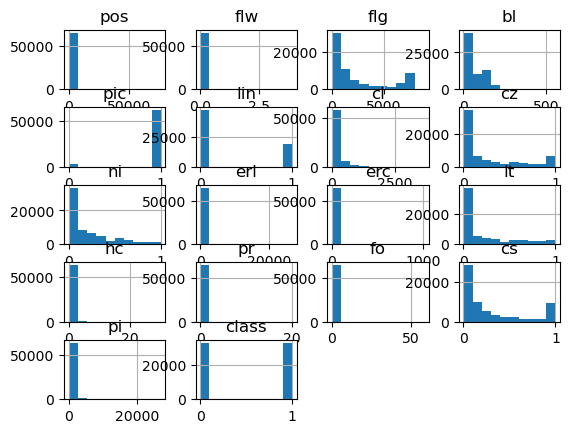

In [9]:
df.hist()

In [10]:
# Instanciar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a todas las columnas
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'flw'}>,
        <Axes: title={'center': 'flg'}>, <Axes: title={'center': 'bl'}>],
       [<Axes: title={'center': 'pic'}>, <Axes: title={'center': 'lin'}>,
        <Axes: title={'center': 'cl'}>, <Axes: title={'center': 'cz'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'erl'}>,
        <Axes: title={'center': 'erc'}>, <Axes: title={'center': 'lt'}>],
       [<Axes: title={'center': 'hc'}>, <Axes: title={'center': 'pr'}>,
        <Axes: title={'center': 'fo'}>, <Axes: title={'center': 'cs'}>],
       [<Axes: title={'center': 'pi'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

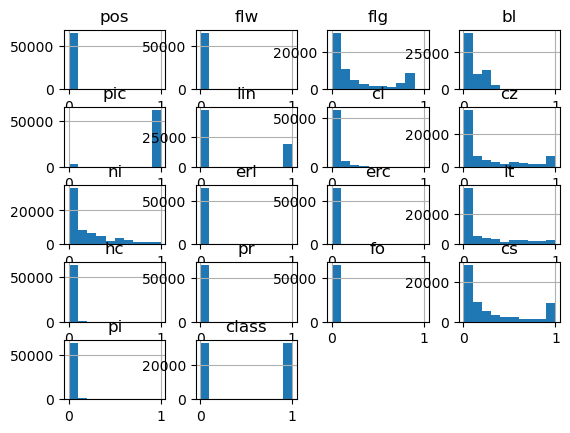

In [11]:
df_normalized.hist()

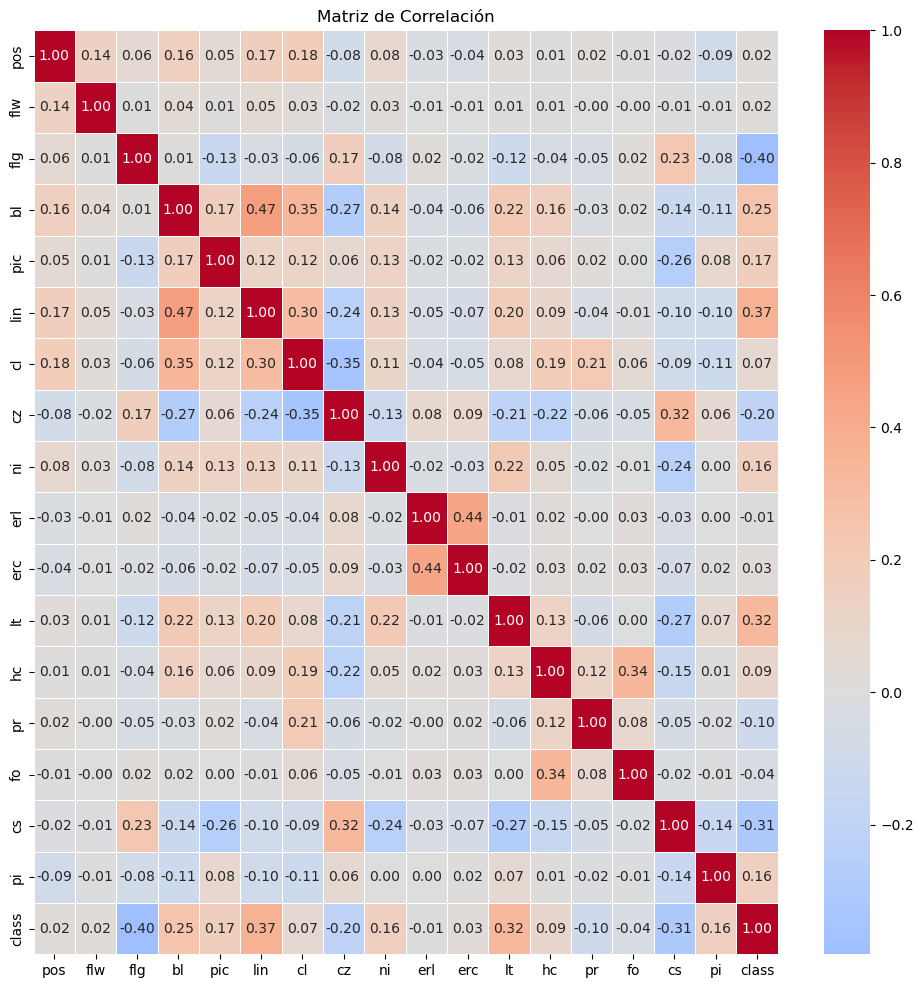

In [12]:

# Crear la matriz de correlación
corr_matrix = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Crear un mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")

# Añadir el título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

## Modelo de regresion logistica

In [13]:
# Definir variables independientes (X) y dependiente (y)
X = df_normalized.drop(columns=['class'])
y = df_normalized['class']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar prediccio<nes
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Mostrar el coeficiente de determinación R^2 y el MSE
r2 = model.score(X_test, y_test)

print("Error cuadrático medio (MSE):",mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 0.20396448798408082
Coeficiente de determinación (R²): 0.7960355120159192


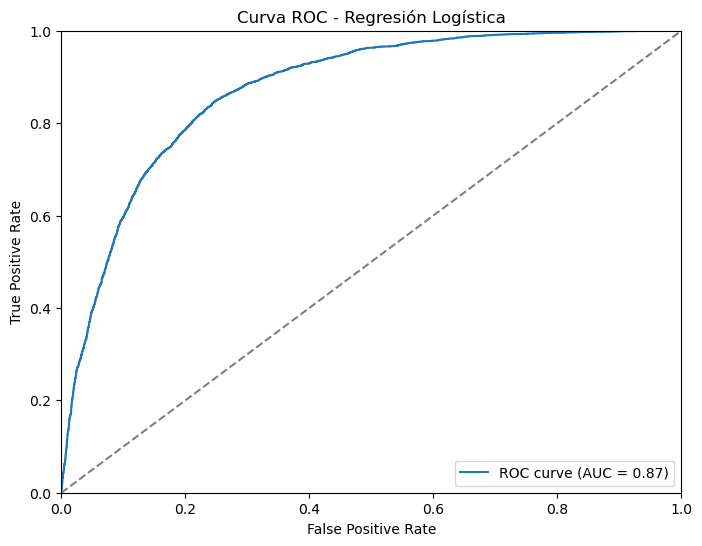

In [14]:

# Predecir las probabilidades en el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]  # Obtener solo las probabilidades de la clase positiva

# Generar los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC (Area Under Curve)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

## Modelo de regresion lineal

In [58]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df_normalized.drop(columns=['class'])  # Variables independientes
y = df_normalized['class']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Mostrar el coeficiente de determinación R^2 y el MSE
r2 = model.score(X_test, y_test)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 0.15764644875119876
Coeficiente de determinación (R²): 0.3693243028644624


## Kmeans

In [59]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters = 300, tol= 1e-4):
        self.n_clusters = n_clusters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.max_iters= max_iters

    def fit(self, X):
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis = 1)
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(np.abs(new_centroids-self.centroids) <self.tol):
                break

            self.centroids = new_centroids
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis = 1)

X = df_normalized.drop(columns=['class'])
y_true = df_normalized['class']  # Variable dependiente
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

def relabel_clusters(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    relabeling = np.argmax(cm, axis = 1)
    new_predicted_labels = np.array([relabeling[label] for label in predicted_labels])
    return new_predicted_labels

y_pred = relabel_clusters(true_labels=y_true, predicted_labels=y_pred)

report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67     32866
         1.0       0.67      0.73      0.70     32460

    accuracy                           0.69     65326
   macro avg       0.69      0.69      0.69     65326
weighted avg       0.69      0.69      0.69     65326



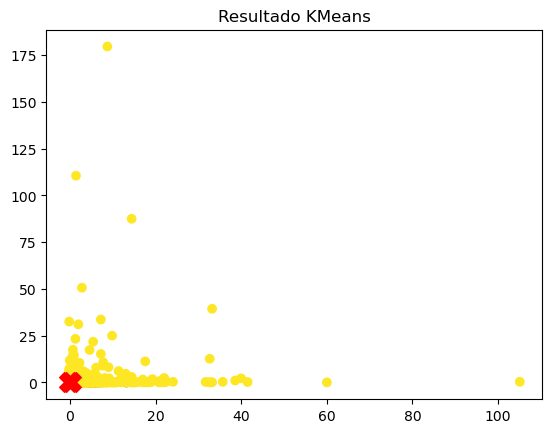

In [60]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="viridis")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c="red", marker="X")
plt.title("Resultado KMeans")
plt.show()
